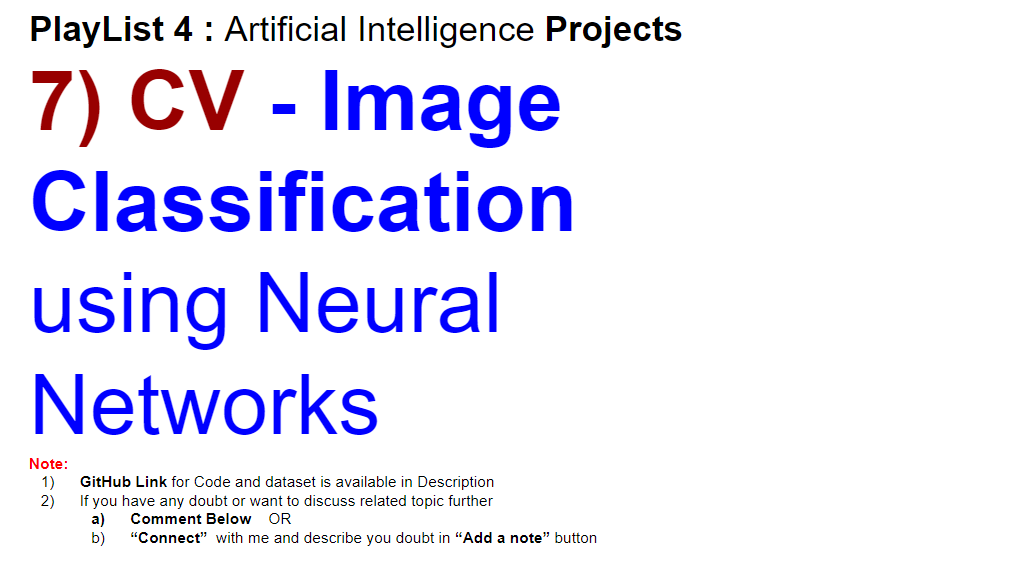

In machine learning, classification means categorizing the known classes, 
        For example, categorizing the most profitable and non-interested customers from a dataset for advertising a particular product. 

You must have trained a classification model with a machine learning algorithm before.

However, here we will train a classification model with neural networks.

#### Classification with Neural Networks

Classification is the task of categorizing the known classes based on their features. 

In most classification problems, machine learning algorithms will do the job, 

but while classifying a large dataset of images, you will need to use a neural network.

In [1]:
# Let's use the famous "MNIST fashion" dataset, which contains 70,000 clothing fashion images
# weblink :
        # https://www.kaggle.com/zalando-research/fashionmnist
from tensorflow import keras
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest,ytest) = fashion.load_data()

Image Label : 1


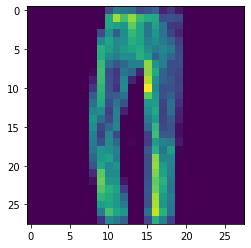

In [17]:
# Let’s have a quick look at one of the samples of the images from the dataset:

import matplotlib.pyplot as plt
imgIndex = 11
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [3]:
# let’s have a look at the shape of both the training and test data:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Let's build a neural network architecture with two hidden layers:

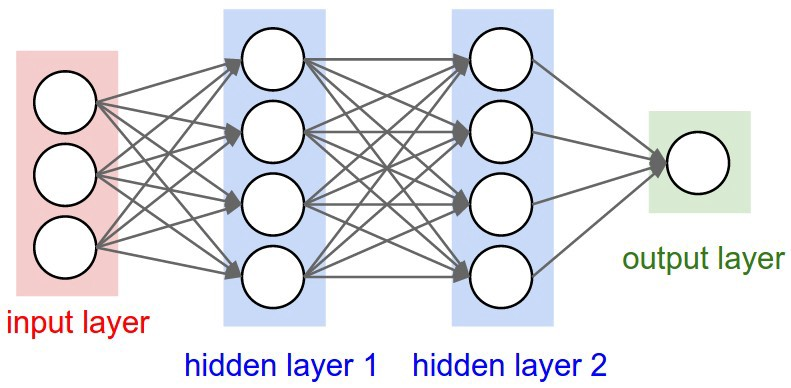

#### The first layer 
        of a neural network is the input layer that receives the data as input.

#### The hidden layers 
        are responsible for all the calculations to learn from the features of the input data.

#### The last layer 
        of a neural network is the output layer which classifies the data and provides the final output. 

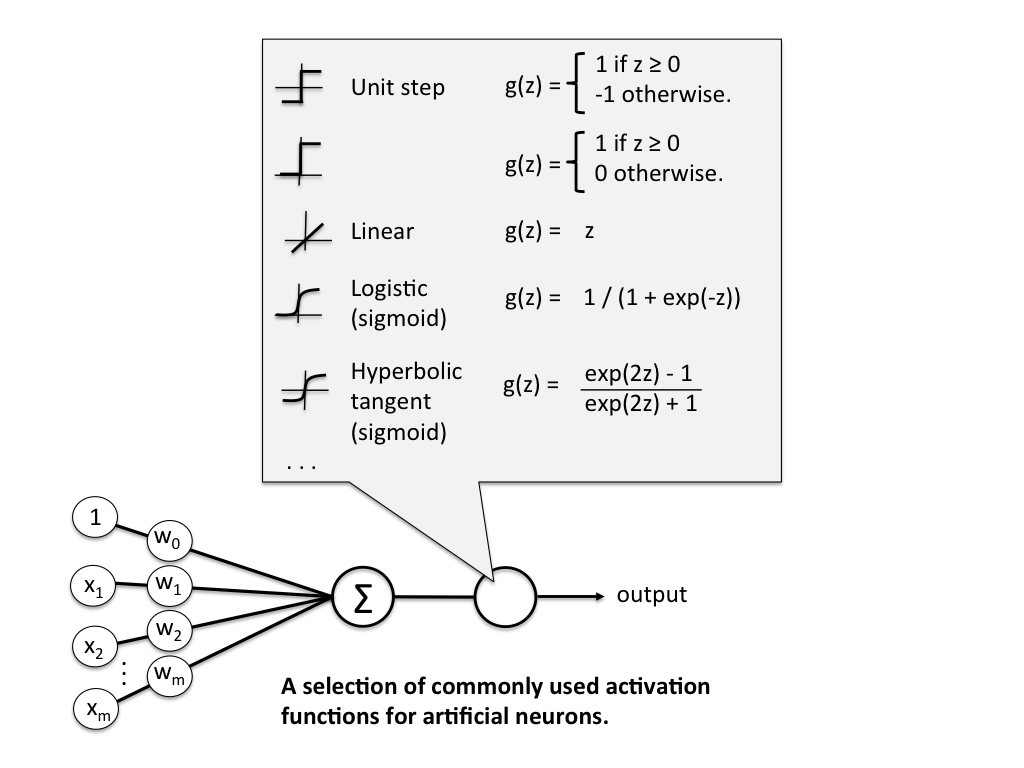

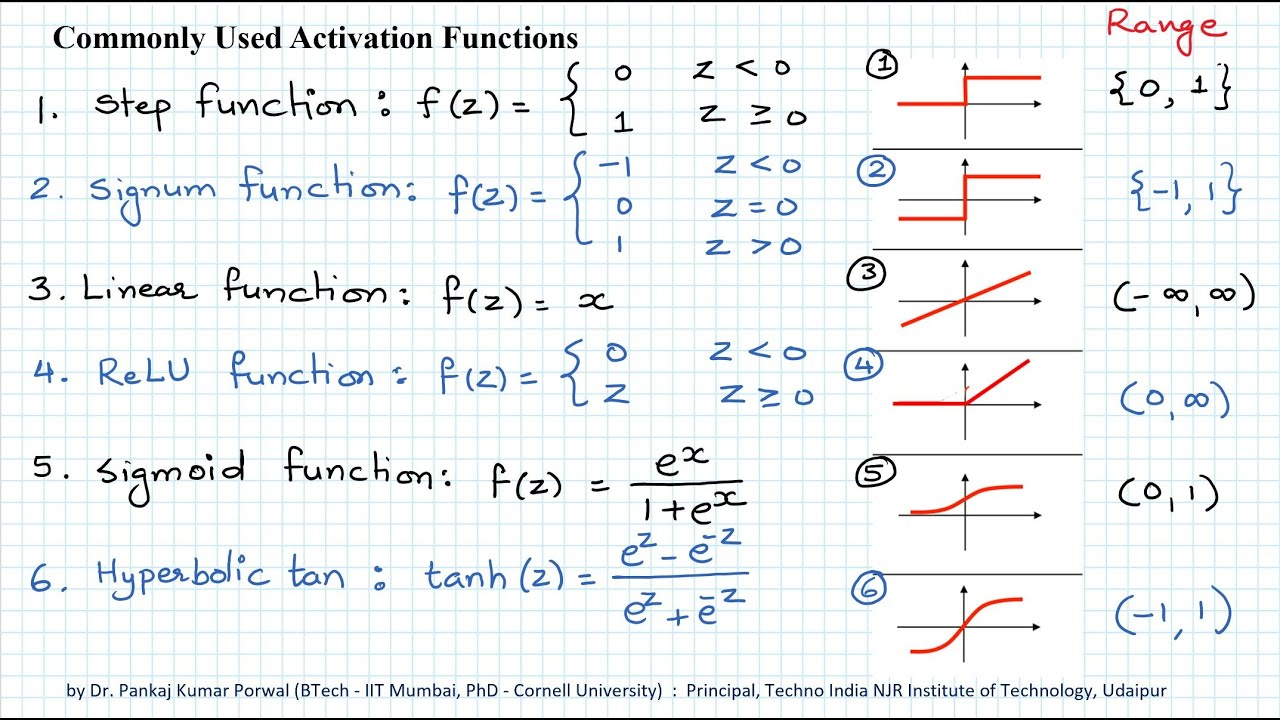

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = "relu"),
    # Rectified Linear Unit Function (ReLU)
        #is the most widely used activation function in neural network architectures. 
        # It is a faster activation function and 
                # has better performance and generalization compared to all other activation functions. 
        # The ReLU activation function is widely used in deep neural network architectures to solve problems 
                # such as object recognition and speech recognition.
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax"),
    # the softmax function is used in multiclass classification problems. 
        # and sigmoid function (in Logistic Regression) is used in binary classification problems  
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Before training Neural Netowrk model, 
    # Let's split the training data into training and validation sets:

xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [7]:
# Let's train a neural network for the task of image classification:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

history = model.fit(xtrain,ytrain, epochs=30,
                   validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7068 - accuracy: 0.7659 - val_loss: 0.5045 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4900 - accuracy: 0.8299 - val_loss: 0.4623 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4446 - accuracy: 0.8451 - val_loss: 0.4324 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4172 - accuracy: 0.8539 - val_loss: 0.4498 - val_accuracy: 0.8362
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3967 - accuracy: 0.8602 - val_loss: 0.3887 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3812 - accuracy: 0.8649 - val_loss: 0.3754 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3668 - accuracy: 0.8703 - val_loss: 0.3736 - val_accuracy:

In [18]:
# let’s look at the predictions:
new = xtest[:6]
predictions = model.predict(new)
predictions

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# let's look at the predicted classes:
import numpy as np
classes = np.argmax(predictions,axis=1)
classes

array([9, 2, 1, 1, 6, 1], dtype=int64)